In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import datetime as dt

In [4]:
bil = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/billboard/billboard_weekly.pkl')
bil['uri'] = 'spotify:track:' + bil['song_id']
bil

,date,song,artist,song_id,uri
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d
...,...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo,spotify:track:6UGHk2cmbDC1oidVjXcCKo
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO,spotify:track:0md3dDLRwrsgBQ59CfgmXO
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU,spotify:track:5r9h2NUZTuQD3mvZXfMGmU
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o,spotify:track:37Edt4Ro7v2STgu75Fj35o


In [81]:
audio = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/spotify_data/billboard_audio_features.pkl')
audio = audio.drop_duplicates()
audio

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.5780,0.604,224695,0.366,0.000000,5,0.1330,-7.519,1,0.0282,141.981,4,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.130
2,0.0383,0.591,141806,0.764,0.000000,1,0.1030,-5.484,1,0.0483,169.928,4,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.478
5,0.0203,0.736,212000,0.704,0.000000,3,0.0501,-7.409,0,0.0615,149.995,4,spotify:track:27NovPIUIRrOZoCHxABJwK,0.894
9,0.1110,0.647,161853,0.765,0.000000,1,0.3150,-6.459,1,0.0600,79.994,4,spotify:track:58UKC45GPNTflCN6nwCUeF,0.855
14,0.0451,0.807,230747,0.893,0.000028,11,0.3660,-3.745,0,0.0347,126.011,4,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003120,0.2630,0.598,194240,0.560,0.000095,10,0.4300,-10.529,1,0.0290,110.402,4,spotify:track:6WdhPUH1mvuvtmDjLSSAZn,0.676
1003202,0.2150,0.512,153173,0.977,0.000000,2,0.3430,-4.505,1,0.0671,120.165,4,spotify:track:6LqbJXriVJyqJCd9jYoPqP,0.731
1003285,0.1630,0.535,183360,0.366,0.000000,9,0.0791,-16.004,1,0.0496,88.732,4,spotify:track:3BmQL02PItbRsBL6j7VJc3,0.590
1003369,0.1400,0.693,317213,0.370,0.000199,7,0.4600,-13.270,1,0.0295,102.827,4,spotify:track:0WTCCeS8DRcFGOu43p0A2C,0.312


In [82]:
merged = pd.merge(bil, audio, how='left', on='uri')
merged

,date,song,artist,song_id,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.5780,0.604,224695.0,0.366,0.000000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.0383,0.591,141806.0,0.764,0.000000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,0.0203,0.736,212000.0,0.704,0.000000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF,0.1110,0.647,161853.0,0.765,0.000000,1.0,0.3150,-6.459,1.0,0.0600,79.994,4.0,0.855
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.0451,0.807,230747.0,0.893,0.000028,11.0,0.3660,-3.745,0.0,0.0347,126.011,4.0,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo,spotify:track:6UGHk2cmbDC1oidVjXcCKo,0.0174,0.528,370427.0,0.921,0.000186,2.0,0.0472,-7.640,1.0,0.0524,144.368,4.0,0.298
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO,spotify:track:0md3dDLRwrsgBQ59CfgmXO,0.8580,0.414,228267.0,0.299,0.212000,10.0,0.1280,-12.293,1.0,0.0303,88.516,3.0,0.447
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU,spotify:track:5r9h2NUZTuQD3mvZXfMGmU,0.7010,0.673,167483.0,0.595,0.000000,1.0,0.1290,-7.766,1.0,0.0418,132.019,4.0,0.690
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o,spotify:track:37Edt4Ro7v2STgu75Fj35o,0.0621,0.696,136276.0,0.602,0.000000,1.0,0.1370,-3.123,1.0,0.3480,175.147,4.0,0.487


In [83]:
# Drop rows that have null
merged = merged.dropna()

In [84]:
merged['date'] = pd.to_datetime(merged['date'])
merged['month'] = merged['date'].dt.strftime('%Y-%m')
merged['month'] = pd.to_datetime(merged['month'])
monthly_df = merged.groupby('month').mean()
monthly_df = monthly_df.reset_index()
monthly_df = monthly_df[('1975-01-01' <= monthly_df['month']) & (monthly_df['month'] <= '2021-10-01')]
monthly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_69706/1109325218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['date'] = pd.to_datetime(merged['date'])
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_69706/1109325218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged['month'] = merged['date'].dt.strftime('%Y-%m')
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_69706/1109325218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
24,1975-01-01,0.358626,0.591538,224563.8050,0.579553,0.064224,5.0625,0.197377,-10.259368,0.8125,0.052111,115.325083,3.9575,0.672567
25,1975-02-01,0.368940,0.588253,220808.0600,0.588122,0.050941,5.4350,0.181158,-10.012720,0.8600,0.050159,115.271552,3.9500,0.665122
26,1975-03-01,0.334843,0.590070,229350.4920,0.581048,0.054995,5.8280,0.184357,-10.316240,0.8400,0.050184,114.686858,3.9220,0.664684
27,1975-04-01,0.338728,0.580120,236438.6350,0.551515,0.069511,6.1125,0.158960,-10.934342,0.7850,0.052581,117.653617,3.9000,0.653632
28,1975-05-01,0.337907,0.571930,234010.9940,0.587851,0.076120,5.7140,0.163500,-10.626060,0.7500,0.057598,121.127004,3.9060,0.668920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2021-06-01,0.236636,0.663382,192765.3875,0.604500,0.000449,5.2550,0.179318,-6.803228,0.6750,0.142282,122.396225,3.9575,0.464047
582,2021-07-01,0.217580,0.651402,193346.3260,0.635346,0.002264,5.2460,0.193207,-6.248534,0.6860,0.114297,123.421260,3.9820,0.499031
583,2021-08-01,0.210171,0.657075,193621.0700,0.642460,0.006846,5.3675,0.180522,-6.190460,0.6825,0.110391,124.751413,3.9675,0.523641
584,2021-09-01,0.213370,0.642172,205435.6775,0.638335,0.002790,5.3075,0.183702,-6.215815,0.7025,0.122931,124.047017,3.9625,0.495950


## ADF Test

In [85]:
adf_df = monthly_df.drop(columns=['month', 'duration_ms', 'instrumentalness', 'key', 'time_signature'])

for col in adf_df.columns:
    adf_test = adfuller(monthly_df[col])
    
    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical values :')
    for k, v in adf_test[4].items():
        print('\t', k, v)

acousticness
ADF Statistic: -3.061751
p-value: 0.029516
Critical values :
	 1% -3.4423174665535385
	 5% -2.866818952732754
	 10% -2.569581505602171
danceability
ADF Statistic: -2.143659
p-value: 0.227325
Critical values :
	 1% -3.442273822587951
	 5% -2.8667997388278583
	 10% -2.5695712667942465
energy
ADF Statistic: -2.381061
p-value: 0.147153
Critical values :
	 1% -3.44218748274498
	 5% -2.8667617276005006
	 10% -2.569551011281552
liveness
ADF Statistic: -8.541763
p-value: 0.000000
Critical values :
	 1% -3.442081300525009
	 5% -2.8667149792729596
	 10% -2.569526100127551
loudness
ADF Statistic: -1.225941
p-value: 0.662338
Critical values :
	 1% -3.4422089502693454
	 5% -2.866771178805824
	 10% -2.5695560476482164
mode
ADF Statistic: -4.425499
p-value: 0.000267
Critical values :
	 1% -3.4421660928041633
	 5% -2.8667523104859627
	 10% -2.56954599309042
speechiness
ADF Statistic: -0.693923
p-value: 0.848317
Critical values :
	 1% -3.442273822587951
	 5% -2.8667997388278583
	 10% -2.56

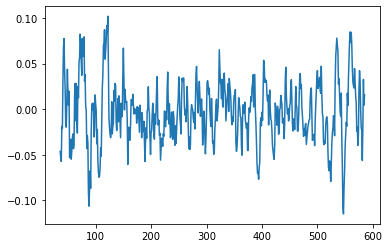

In [86]:
valence_diff1 = monthly_df.valence.diff(12).dropna()

plt.plot(valence_diff1)

In [87]:
valence_diff1

36    -0.046355
37    -0.051370
38    -0.057349
39    -0.018887
40    -0.021195
         ...   
581   -0.056310
582   -0.018350
583    0.032561
584    0.004279
585    0.015752
Name: valence, Length: 550, dtype: float64

In [88]:
adf_test = adfuller(valence_diff1)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical values :')
for k, v in adf_test[4].items():
    print('\t', k, v)

ADF Statistic: -5.617387
p-value: 0.000001
Critical values :
	 1% -3.4427485933555886
	 5% -2.8670087381529723
	 10% -2.569682641509434


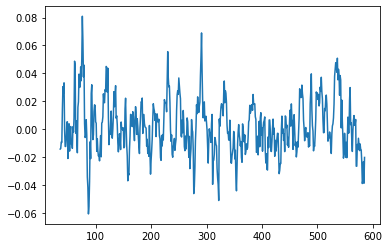

In [114]:
danceability_diff1 = monthly_df.danceability.diff(12).dropna()

plt.plot(danceability_diff1)

In [115]:
adf_test = adfuller(danceability_diff1)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical values :')
for k, v in adf_test[4].items():
    print('\t', k, v)

ADF Statistic: -5.155966
p-value: 0.000011
Critical values :
	 1% -3.4425861905056556
	 5% -2.8669372502674824
	 10% -2.5696445454608505


In [91]:
unemp = pd.read_csv('/Users/kohtaasakura/PyDev/grad_thesis/economic_indicators/unemployment_rate.csv')
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
unemp = unemp[('1975-01-01' <= unemp['DATE']) & (unemp['DATE'] <= '2021-10-01')]
unemp

,DATE,UNRATE
324,1975-01-01,8.1
325,1975-02-01,8.1
326,1975-03-01,8.6
327,1975-04-01,8.8
328,1975-05-01,9.0
...,...,...
881,2021-06-01,5.9
882,2021-07-01,5.4
883,2021-08-01,5.2
884,2021-09-01,4.8


In [92]:
adf_test = adfuller(unemp.UNRATE)

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical values :')
for k, v in adf_test[4].items():
    print('\t', k, v)

ADF Statistic: -3.327165
p-value: 0.013707
Critical values :
	 1% -3.442102384299813
	 5% -2.8667242618524233
	 10% -2.569531046591633


In [93]:
unemp.iloc[1:, 1]

325    8.1
326    8.6
327    8.8
328    9.0
329    8.8
      ... 
881    5.9
882    5.4
883    5.2
884    4.8
885    4.5
Name: UNRATE, Length: 561, dtype: float64

In [116]:
x = unemp.iloc[12:, 1]
x = sm.add_constant(x)
y = valence_diff1
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5196
Date:                Thu, 19 Jan 2023   Prob (F-statistic):              0.471
Time:                        23:02:16   Log-Likelihood:                 1085.4
No. Observations:                 550   AIC:                            -2167.
Df Residuals:                     548   BIC:                            -2158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.005     -1.298      0.1

In [118]:
x = unemp.iloc[12:, 1]
x = sm.add_constant(x)
y = danceability_diff1
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.03275
Date:                Thu, 19 Jan 2023   Prob (F-statistic):              0.856
Time:                        23:02:20   Log-Likelihood:                 1385.4
No. Observations:                 550   AIC:                            -2767.
Df Residuals:                     548   BIC:                            -2758.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.003      0.374      0.7

In [113]:
x = unemp.iloc[12:, 1]
x = sm.add_constant(x)
y = monthly_df.energy.diff(12).dropna()
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.896
Date:                Thu, 19 Jan 2023   Prob (F-statistic):             0.0155
Time:                        23:01:51   Log-Likelihood:                 1198.9
No. Observations:                 550   AIC:                            -2394.
Df Residuals:                     548   BIC:                            -2385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0095      0.004     -2.129      0.0

In [120]:
x = unemp.iloc[12:, 1]
x = sm.add_constant(x)
y = monthly_df.speechiness.diff(12).dropna()
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.631
Date:                Thu, 19 Jan 2023   Prob (F-statistic):             0.0180
Time:                        23:03:20   Log-Likelihood:                 1651.4
No. Observations:                 550   AIC:                            -3299.
Df Residuals:                     548   BIC:                            -3290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0059      0.002      3.025      0.0

In [111]:
x = unemp.iloc[12:, 1]
x = sm.add_constant(x)
y = monthly_df.loudness.diff(12).dropna()
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.241
Date:                Thu, 19 Jan 2023   Prob (F-statistic):              0.135
Time:                        23:01:29   Log-Likelihood:                -327.92
No. Observations:                 550   AIC:                             659.8
Df Residuals:                     548   BIC:                             668.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1915      0.072      2.671      0.0

In [99]:
x = [unemp.iloc[1:, 1].values, unemp.iloc[:-1, 1].values]
x

[array([ 8.1,  8.6,  8.8,  9. ,  8.8,  8.6,  8.4,  8.4,  8.4,  8.3,  8.2,
         7.9,  7.7,  7.6,  7.7,  7.4,  7.6,  7.8,  7.8,  7.6,  7.7,  7.8,
         7.8,  7.5,  7.6,  7.4,  7.2,  7. ,  7.2,  6.9,  7. ,  6.8,  6.8,
         6.8,  6.4,  6.4,  6.3,  6.3,  6.1,  6. ,  5.9,  6.2,  5.9,  6. ,
         5.8,  5.9,  6. ,  5.9,  5.9,  5.8,  5.8,  5.6,  5.7,  5.7,  6. ,
         5.9,  6. ,  5.9,  6. ,  6.3,  6.3,  6.3,  6.9,  7.5,  7.6,  7.8,
         7.7,  7.5,  7.5,  7.5,  7.2,  7.5,  7.4,  7.4,  7.2,  7.5,  7.5,
         7.2,  7.4,  7.6,  7.9,  8.3,  8.5,  8.6,  8.9,  9. ,  9.3,  9.4,
         9.6,  9.8,  9.8, 10.1, 10.4, 10.8, 10.8, 10.4, 10.4, 10.3, 10.2,
        10.1, 10.1,  9.4,  9.5,  9.2,  8.8,  8.5,  8.3,  8. ,  7.8,  7.8,
         7.7,  7.4,  7.2,  7.5,  7.5,  7.3,  7.4,  7.2,  7.3,  7.3,  7.2,
         7.2,  7.3,  7.2,  7.4,  7.4,  7.1,  7.1,  7.1,  7. ,  7. ,  6.7,
         7.2,  7.2,  7.1,  7.2,  7.2,  7. ,  6.9,  7. ,  7. ,  6.9,  6.6,
         6.6,  6.6,  6.6,  6.3,  6.3, 

In [3]:
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'points', fig=fig)

NameError: name 'model' is not defined

<Figure size 1200x800 with 0 Axes>